# Homework (10 pts) - More Advanced Python

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

1. (1 pt) Use a list coprehension to find all odd values in [1, 100] that are divisible by 9.

In [2]:
[x
 for x in range(1, 101)
 if x % 9 == 0
]

[9, 18, 27, 36, 45, 54, 63, 72, 81, 90, 99]

2. (1 pt) Use a list comprehension to find the square root of each odd number in [10, 11, 12, 13, 14, 15].

In [3]:
[np.sqrt(value)
 for value in range(10,16)
 if value % 2 == 1
]

[3.3166247903554, 3.605551275463989, 3.872983346207417]

3. (1 pt) For the 3x3 matrix **mat** below, use a list comprehension to find the square of the last column in every other row.

In [4]:
mat = np.random.randint(0, 10, (3,3))
mat

array([[6, 6, 0],
       [0, 4, 6],
       [0, 6, 4]])

In [5]:
[row[-1]**2
 for row in mat[::2]
]

[0, 16]

4. (1 pt) Write a function that converts Farenheit to Celcius and use it to plot Celcius vs Farenheit for Farenheit values from 0 to 100 in unit steps. Make sure to label axes.

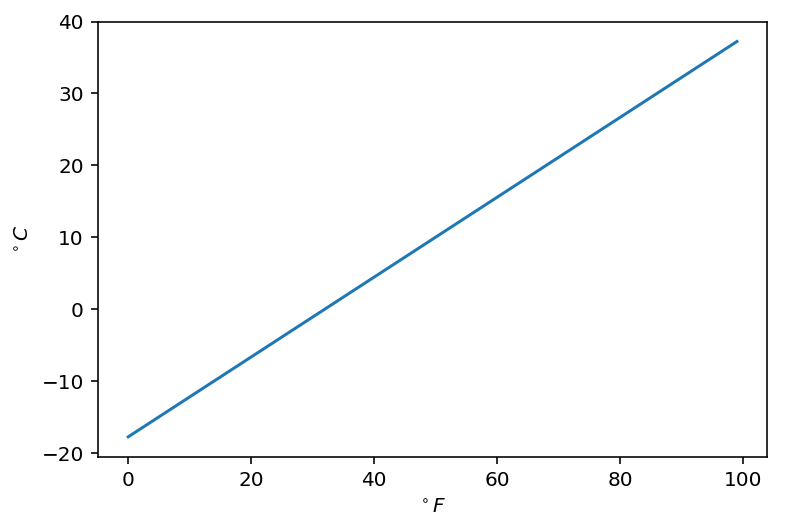

In [6]:
def farenheitToCelcius(F):
    C = (F - 32) * 5/9
    return C

degreesF = np.arange(100)
degreesC = farenheitToCelcius(degreesF)
plt.figure()
plt.plot(degreesF, degreesC)
plt.xlabel("$^\circ F$")
plt.ylabel("$^\circ C$");

5. (1 pt) Write a function that returns the sum, difference, product and ratio of two values such that the second value defaults to 5. Use it on the value 3.

In [7]:
def sumDiffProdRatio(a, b=5):
    return a+b, a-b, a*b, a/b

sumDiffProdRatio(3)

(8, -2, 15, 0.6)

6. (1 pt) Use Numba to accelerate the above function and time it with and without acceleration given a single input of a 10000 element array of random values between 0 and 1.

In [3]:
# 10,000 random values
a = np.random.random(10000,)

# time pure python function
# -------------------------

def sumDiffProdRatio(a, b=5):
    return a+b, a-b, a*b, a/b

print("Pure Python:")
%timeit sumDiffProdRatio(a)

# time Numba accelerated function
# -------------------------------

import numba

@numba.njit
def sumDiffProdRatio(a, b=5):
    return a+b, a-b, a*b, a/b

print("Numba:")
%timeit sumDiffProdRatio(a)

Pure Python:
20.3 µs ± 135 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Numba:
22.9 µs ± 8.76 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


7. (2 pts) Define a **neuron** class that has attributes **cell_type, brain_region, basal_spike_rate_per_sec**. Allow these attributes to be set as inputs when creating an instance of the class. Also make it so that printing an instance of the class should show the cell type and brain region. Create an intance of the class with some attribute values (whatever you want) and print it.

In [9]:
class neuron:
    
    def __init__(self, cell_type, brain_region, basal_spike_rate_per_sec):
        self.cell_type = cell_type
        self.brain_region = brain_region
        self.basal_spike_rate_per_sec = basal_spike_rate_per_sec
    
    def __repr__(self):
        return f"{self.cell_type} in {self.brain_region}"


mycell = neuron("Granule", "Hippocampus", 0.5)
print(mycell)

Granule in Hippocampus


8. (2 pt) Add a method to your **neuron** class definition above (don't alter the code in the above cell, just copy and past to below cell and edit there) that returns a spike rate as a function of two inputs: an array of input strengths and a concentration of a modulatory drug. Make it so that the returned spike rate is the basal spike rate plus the sum of all input strengths multiplied by the drug concentration. Create an instance of your class and use it to generate the cell's spike rate for 101 drug concentrations equally spaced on a logscale from 1 to 100 and given an array of 10 random input strengths in the range 0 to 1 (use different random inputs for each concentration). Plot the spike rate vs drug concentration so computed.

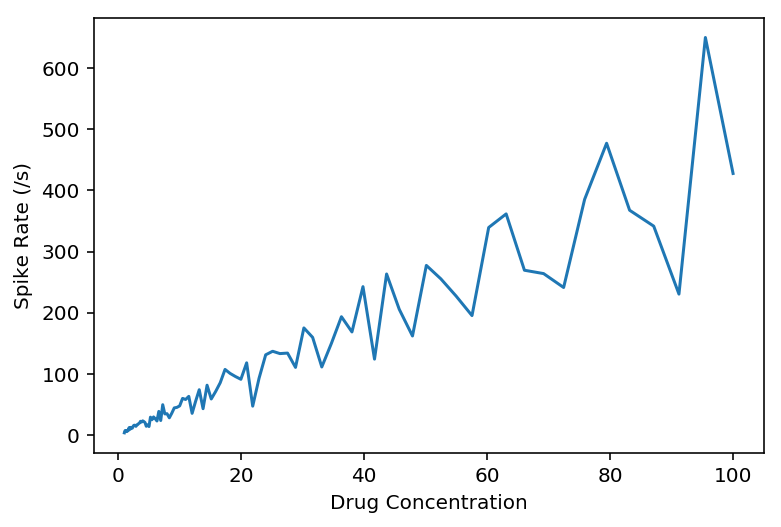

In [10]:
class neuron:
    
    def __init__(self, cell_type, brain_region, basal_spike_rate_per_sec):
        self.cell_type = cell_type
        self.brain_region = brain_region
        self.basal_spike_rate_per_sec = basal_spike_rate_per_sec
    
    def __repr__(self):
        return f"{self.cell_type} in {self.brain_region}"
    
    def get_spike_rate_per_sec(self, input_strengths, drug_conc):
        return self.basal_spike_rate_per_sec + np.sum(input_strengths) * drug_conc

    
mycell = neuron("Granule", "Hippocampus", 0.5)

drug_conc = np.logspace(0, 2, 101)
spike_rates_per_sec = np.zeros(drug_conc.shape)
for i, drug in enumerate(drug_conc):
    input_strengths = np.random.random(10,)
    spike_rates_per_sec[i] = mycell.get_spike_rate_per_sec(input_strengths, drug)

plt.figure()
plt.plot(drug_conc, spike_rates_per_sec)
plt.xlabel("Drug Concentration")
plt.ylabel("Spike Rate (/s)");